In [1]:
import math
import random
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def isPrime(n):
    """
    Check if a number is prime.
    Args:
        n (int): The number to check.
    Returns:
        bool: True if the number is prime, False otherwise.
    The function performs the following checks:
        1. Returns False if n is less than 2, as numbers less than 2 are not prime.
        2. Returns True if n is 2, as 2 is the smallest prime number.
        3. Returns False if n is even and greater than 2.
        4. For odd numbers greater than 2, the function checks divisibility
           from 3 up to the square root of n, skipping even numbers.
    """
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def nBitPrime(n):
    """
    Generate a random prime number that is up to n bits long.
    Args:
        n (int): The number of bits.
    Returns:
        int: A random prime number up to n bits long.
    """
    if n < 1:
        raise ValueError("Number of bits must be at least 1")

    while True:
        random_number = int(random.random() * (2**n))
        if random_number >= 2 and isPrime(random_number):
            return random_number
        
def factor(pq: int):
    """
    Factorize a number into two prime factors.
    Args:
        pq (int): The number to be factorized, which is a product of two primes.
    Returns:
        tuple: A tuple containing the two prime factors (P, Q).
    """
    for i in range(2, int(math.sqrt(pq)) + 1):
        if pq % i == 0:
            P = i
            Q = pq // i
    return P, Q

def time_rsa_factor(function, pg):
    """
    Timing function for factor of RSA algos.
    Args:
        function (function): sorting function
        pq (int): The number to be factorized, which is a product of two primes.
    Returns:
        float: Time in milliseconds 
    """
    t1 = time()
    function(pq)
    t2 = time()
    return (t2 - t1) * 1000

n = 10
pq = nBitPrime(n) * nBitPrime(n)
print(factor(pq))

(673, 821)


In [2]:
data = []
print(f"{'n':<8}{'Time':<9}")
for n in range(10, 34, 1):
    pq = nBitPrime(n) * nBitPrime(n)
    factor_time = time_rsa_factor(factor, pq)

    data_entry = {
        'n': n,
        'time': factor_time
        }
    
    data.append(data_entry)
    
    print(f"{n:<8}{round(factor_time, 2):<9}")

# save the data into a pandas df
df = pd.DataFrame(data)


n       Time     
10      0.04     
11      0.01     
12      0.25     
13      0.23     
14      0.45     
15      0.77     
16      0.24     
17      8.06     
18      16.51    
19      33.42    
20      68.26    
21      120.3    
22      163.39   
23      77.13    
24      648.48   
25      566.62   
26      1129.15  
27      7279.89  


KeyboardInterrupt: 

In [3]:
df = pd.read_csv('factor_time.csv')

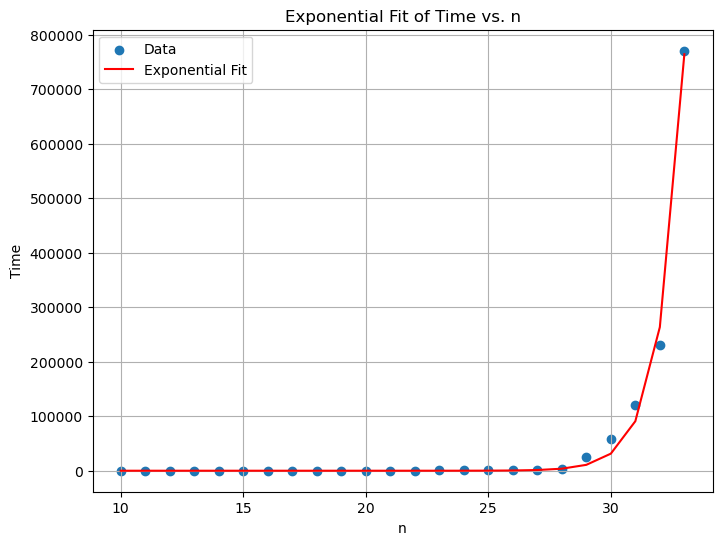

In [4]:
n_data = df['n']
time_data = df['time']

# Define the exponential function
def exponential_func(n, a, b):
    return a * np.exp(b * n)

# Perform curve fitting
params, covariance = curve_fit(exponential_func, n_data, time_data)

# Extract parameters
a_fit, b_fit = params

# Predicted values using the fitted parameters
time_fit = exponential_func(n_data, a_fit, b_fit)

# Plotting the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(n_data, time_data, label='Data')
plt.plot(n_data, time_fit, label='Exponential Fit', color='red')
plt.xlabel('n')
plt.ylabel('Time')
plt.title('Exponential Fit of Time vs. n')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(params)

[4.18422116e-10 1.06487111e+00]


In [6]:
df['time_ms'] = df['time']
df.to_csv('factor_time.csv', index=False)

In [ ]:
np.array([1024], dtype=np.float128)

array([1024.], dtype=float128)

In [47]:
exponential_func(np.array([1024], dtype=np.float128), a_fit, b_fit)[0] * (1 / (1000 * 60 * 60 * 24 * 365.25))

4.8908386859813889824e+453

In [56]:
exponential_func(np.array([1024], dtype=np.float128), a_fit, b_fit) * (1 / (1000 * 60 * 60 * 24 * 365.25))

array([4.89083869e+453], dtype=float128)

In [44]:

n = 71
m = int(math.sqrt(n)) + 1
primes = [x for x in range(n+1)]
for i in range(2, m):
    for num in primes[:]:
        if num % i == 0:
            primes.remove(num)
primes

[1, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

In [46]:
import os
if os.path.exists('factor_time.csv'):
    print('True')
else:
    print('False')

False


In [70]:
years = exponential_func(np.array([33], dtype=np.float128), a_fit, b_fit)[0] * (1 / (1000 * 60 * 60 * 24 * 365.25))
print(f'Estimated Years to Crack RSA: {years}')
print(years)

Estimated Years to Crack RSA: 2.4207117875930744e-05
2.4207117875930742265e-05


In [63]:
df['time_years'] = df['time_ms'] * (1 / (1000 * 60 * 60 * 24 * 365.25))